# CS178 HW 2 WINTER 2017
# KODY CHEUNG 85737824

### Problem 1A

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

# Linear Regression Data Points
data = np.genfromtxt("C:\Python35\CS178\Lab2\data\curve80.txt",delimiter=None)

# 1A Splitting 2 column data/curve80.txt into 75/25%
X = data[:,0]
Y = data[:,1]

X = X[:,np.newaxis]  # code expects (M,N), newaxis

Xtr, Xte, Ytr, Yte = ml.splitData(X,Y,0.75) 


### Problem 1B

[[-2.82765049  0.83606916]]


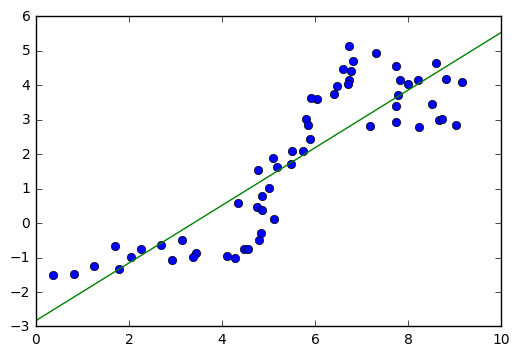

Y = 0.8360691602619539x + -2.827650487664812


Training MSE: 1.127711955609391

Test MSE: 2.2423492030101246


In [2]:
# 1B Creating linear regression predictor of y given x

lr = ml.linear.linearRegress( Xtr, Ytr ); # creating and training model
xs = np.linspace(0,10,200);               # sample large number of possible x values
xs = xs[:,np.newaxis]                     # force it to be an single column matrix
ys = lr.predict( xs );                    # make predictions on it


# Plot the training data along with your prediction function.
plt.plot(Xtr, Ytr,'o')   # Graph points
plt.plot(xs,ys)          # Linear Regression Line
AXES = plt.axis()        # Save axis
plt.show()

# Print the regression coefficicents y = (theta0)x + (theta1) (lr.theta[1] = m, lr.theta[0] = b)
print("Y = {}x + {}\n\n".format(lr.theta[:,1][0], lr.theta[:,0][0]))
# Check they match the plot

# Calculate and report the mean squared error for both data
# MSE = sum(Ytr - (mx + b)).mean()


TrainingTargets = []
for each in range(0,len(Xtr)):
    target = (lr.theta[:,1][0] * Xtr[each] + lr.theta[:,0][0])
    TrainingTargets.append((Ytr[each] - target)**2)
    
Training_MSE = np.mean(TrainingTargets)
print("Training MSE: {}\n".format(Training_MSE))


TestTargets = []
for each in range(0,len(Xte)):
    target = (lr.theta[:,1][0] * Xte[each] + lr.theta[:,0][0])
    TestTargets.append((Yte[each] - target) **  2)
    
Test_MSE = np.mean(TestTargets)
print("Test MSE: {}".format(Test_MSE))


### Problem 1C

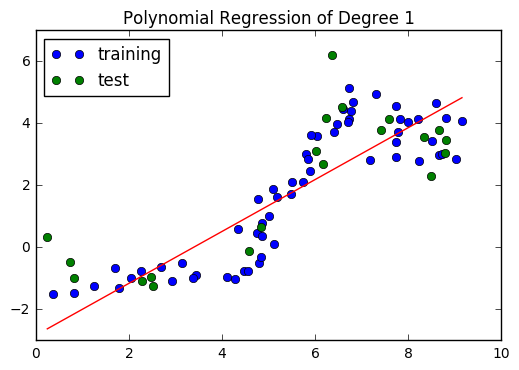

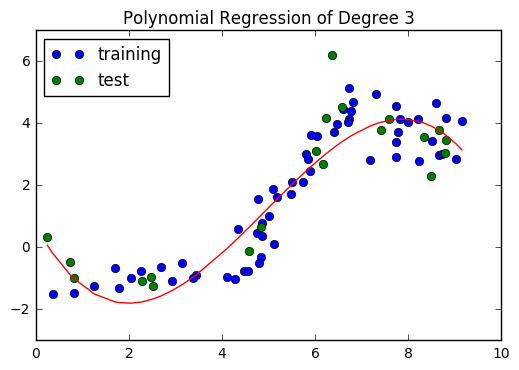

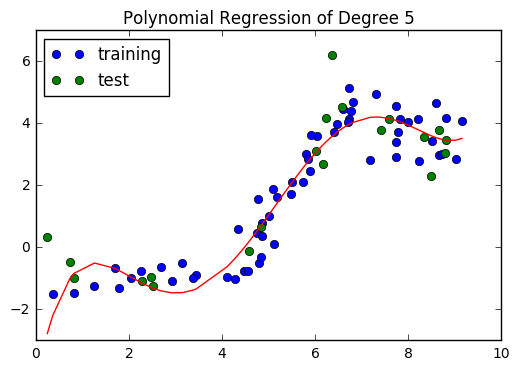

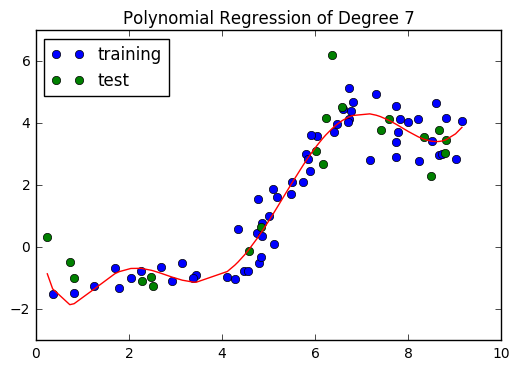

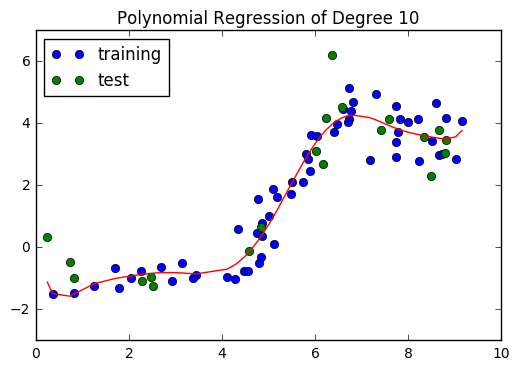

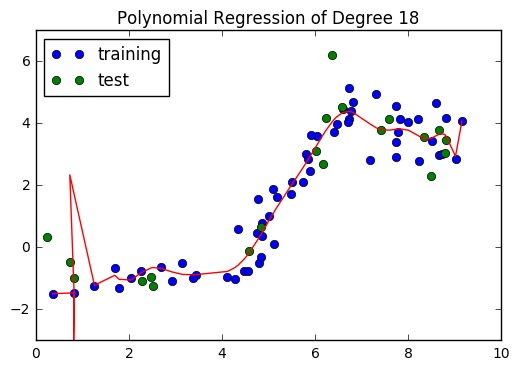

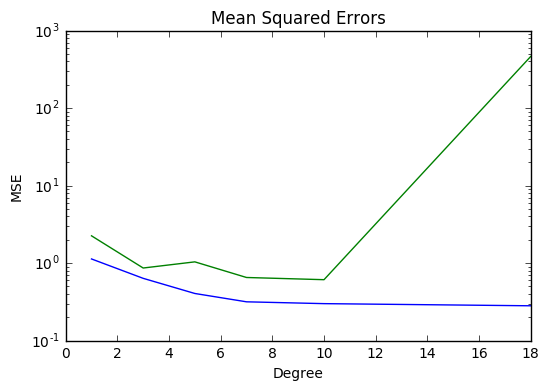

In [14]:
# 1C fitting y = f(x) increasing polynomial order

# Xtr2 = np.zeros( (Xtr.shape[0], 2) )      # M x 2 (m rows,2 columns) matrix array to store quadratic polynomial features
# Xtr2[:,0] = Xtr[:,0]                      # place original X feature as column 1
# Xtr2[:,1] = Xtr[:,0]**2                   # place x^2 feature as column 2

# Create polynomial features up to degree; don't make it constant
# (the linear regression learner will add the constant feature automatically)
##XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)

# Rescale the data matrix so that the features have similar ranges / variance
##XtrP, params = ml.transforms.rescale(XtrP);
# "params" returns the transformation parameters (shift & scale) (mu & sigma)

# Then we can train the model on the scaled feature matrix
##lr = ml.linear.linearRegress( XtrP, Ytr );

# Now, apply the same polynomial expansion & scaling transformation to Xtest:
##XteP = ml.transforms.rescale( ml.transforms.fpoly(Xte, degree, false), params);

# # Create polynomial features up to "degree"; don't create constant feature
# # (the linear regression learner will add the constant feature automatically)
# XtrP = ml.transforms.fpoly(Xtr, degree, bias=False);

# # Rescale the data matrix so that the features have similar ranges / variance
# XtrP,params = ml.transforms.rescale(XtrP);
# # "params" returns the transformation parameters (shift & scale)

# # Then we can train the model on the scaled feature matrix:
# lr = ml.linear.linearRegress( XtrP, Ytr ); # create and train model

# # Now, apply the same polynomial expansion & scaling transformation to Xtest:
# XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte,degree,false), params);

# # Define a function "Phi(X)" which outputs the expanded and scaled feature matrix:

# Phi = lambda X: ml.transforms.rescale( ml.transforms.fpoly(X, degree,False), params)[0]

# # the parameters "degree" and "params" are memorized at the function definition

# # Now, Phi will do the required feature expansion and rescaling:

# YhatTrain = lr.predict( Phi(Xtr) ); # predict on training data

# YhatTest = lr.predict( Phi(Xte) ); # predict on test data

degree = [1,3,5,7,10,18]
TestError = []
TrainingError = []

for d in degree:
    
    XtrP = ml.transforms.fpoly(Xtr, d, bias=False) # features with d columns
    XtrP, params = ml.transforms.rescale(XtrP)     # rescaled features with d columns
                                                   # params are shifted and scaled parameters
    lr = ml.linear.linearRegress( XtrP, Ytr )      # regress on new shift
    
    XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte, d, False), params ) # transforms test data too
            
        
    Phi = lambda X: ml.transforms.rescale( ml.transforms.fpoly(X, d, False), params)[0]  # function of x training data

    YhatTrain = lr.predict( Phi(Xtr) ); # predict on training data

    YhatTest = lr.predict( Phi(Xte) ); # predict on test data
    
    XXX = np.append(Phi(Xtr)[:,-1], Phi(Xte)[:,-1])
    #print(XXX)
    YYY = np.append(YhatTrain,YhatTest)
    #print(YYY)
        
    order = np.argsort(Phi(Xtr)[:,-1]) # order x axis chronologically
    orders = np.argsort(Phi(Xte)[:,-1])
    orderz = np.argsort(XXX)

    
    
    plt.plot(Xtr,Ytr,'o',label = 'training') # training
    plt.plot(Xte,Yte,'o',label = 'test') # test
    
    
    plt.plot(X[orderz],YYY[orderz])
#     plt.plot(np.array(Xtr)[order], np.array(YhatTrain)[order]) # regression in numerical order
#     plt.plot(np.array(Xte)[orders],np.array(YhatTest)[orders])


    trainErr = zip(Ytr[order], YhatTrain[order])
    total = []
    for i,j in trainErr:
        total.append((i-j[0])**2)
    TrainingError.append(np.mean(total))
    
    
    testErr = zip(Yte[orders], YhatTest[orders])
    total2 = []
    for i,j in testErr:
        total2.append((i-j[0])**2)
    TestError.append(np.mean(total2))
    
    if d == 1:
        AXES = plt.axis()
    else:
        plt.axis(AXES)
        
    plt.title("Polynomial Regression of Degree {}".format(d))
    plt.legend(loc="upper left")
    plt.show()
    
    
plt.semilogy(degree,TrainingError,label="Training Error")
plt.semilogy(degree,TestError,label = "Test Error")
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.title("Mean Squared Errors")
plt.show()


### Problem 2

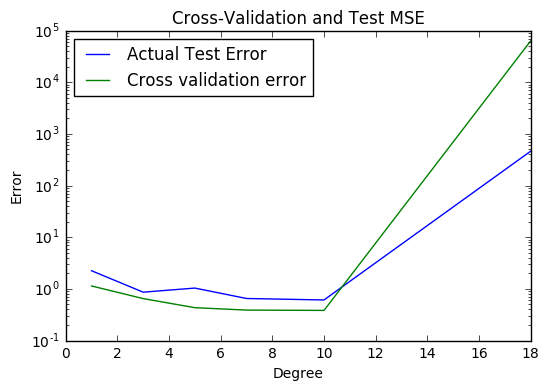

In [15]:
# Cross Validation by creating 5 fold validation test

from sklearn.metrics import mean_squared_error

degree = [1,3,5,7,10,18]
cross_validation_for_each_degree = []

for d in degree:
    
    XtrP = ml.transforms.fpoly(Xtr, d, False)
    
    XtrP, params = ml.transforms.rescale(XtrP) 
    
    J = []
    
    nFolds = 5;

    for iFold in range(nFolds):

        Xti,Xvi,Yti,Yvi = ml.crossValidate(XtrP,Ytr,nFolds,iFold); # take ith data block as validation

        learner = ml.linear.linearRegress(Xti, Yti)  # TODO: train on Xti, Yti , the data for this fold
                
        Yhat = learner.predict( XtrP )
        
        #print(Xti,Xvi,Yti,Yvi)
        
        J.append(mean_squared_error(Ytr,Yhat)) # TODO: now compute the MSE on Xvi, Yvi and save it

    # the overall estimated validation performance is the average of the performance on each fold

    cross_validation_for_each_degree.append(np.mean(J))

plt.semilogy(degree,TestError,label = "Actual Test Error")
plt.semilogy(degree, cross_validation_for_each_degree, label = "Cross validation error")
plt.legend(loc = "upper left")
plt.title("Cross-Validation and Test MSE")
plt.xlabel("Degree")
plt.ylabel("Error")
plt.show()


From this graph we can see that a degree of 10 has the lowest cross-validation error, and all the cross-validation errors are smaller than the actual test MSE except for degree 18, which is higher.